In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set start and end dates of three years back from today.
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-17', tz='America/New_York').isoformat()

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [5]:
# Get 5 years' worth of historical data for AMZN, GOOG
tickers = ["AMZN", "GOOG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for AMZN, GOOG
df_stock_data_1 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=756
).df

next_start_date = pd.Timestamp('2017-01-01', tz='America/New_York').isoformat()
next_end_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()

df_stock_data_2 = api.get_barset(
    tickers,
    timeframe,
    start=next_start_date,
    end=next_end_date,
    limit=756
).df

df_stock_data = pd.concat([df_stock_data_2, df_stock_data_1])

# Display sample data
df_stock_data.head()

AMZN                                       \
                             open      high       low   close   volume   
time                                                                     
2017-01-03 00:00:00-05:00  757.92  758.7595  747.7000  753.66  2511913   
2017-01-04 00:00:00-05:00  758.24  759.6800  754.2000  757.18  1671835   
2017-01-05 00:00:00-05:00  761.55  782.3999  760.2557  780.45  4401014   
2017-01-06 00:00:00-05:00  782.28  799.4400  778.4800  795.99  4559445   
2017-01-09 00:00:00-05:00  798.00  801.7742  791.7700  796.92  2551340   

                             GOOG                                       
                             open      high       low   close   volume  
time                                                                    
2017-01-03 00:00:00-05:00  778.81  789.6300  775.8000  786.14  1061256  
2017-01-04 00:00:00-05:00  788.36  791.3400  783.1600  786.87   634357  
2017-01-05 00:00:00-05:00  786.08  794.4800  785.0200  794.02   762295  
2017-01-06 00:00:00-05:00  795.26  807.9000  792.2041  806.12   967970  
2017-01-09 00:00:00-05:00  806.40  809.9664  802.8300  806.58   777816

In [6]:
df_stock_data_1

AMZN                                         \
                              open     high        low     close   volume   
time                                                                        
2019-01-02 00:00:00-05:00  1465.20  1553.36  1460.9300  1536.730  7132821   
2019-01-03 00:00:00-05:00  1520.01  1538.00  1498.1062  1502.070  6340704   
2019-01-04 00:00:00-05:00  1530.00  1594.00  1518.3100  1574.540  8285596   
2019-01-07 00:00:00-05:00  1602.31  1634.56  1589.1850  1631.120  7252880   
2019-01-08 00:00:00-05:00  1664.69  1676.61  1616.6100  1655.835  8184304   
...                            ...      ...        ...       ...      ...   
2021-12-13 00:00:00-05:00  3441.43  3442.00  3382.6000  3391.220  1388353   
2021-12-14 00:00:00-05:00  3350.01  3389.98  3328.8000  3381.840  2394960   
2021-12-15 00:00:00-05:00  3373.00  3472.00  3303.9000  3466.930  3357249   
2021-12-16 00:00:00-05:00  3466.97  3483.32  3363.2050  3375.940  2669900   
2021-12-17 00:00:00-05:00  3350.01  3417.97  3312.2710  3400.340  3032787   

                              GOOG                                          
                              open       high        low    close   volume  
time                                                                        
2019-01-02 00:00:00-05:00  1016.57  1052.3200  1015.7100  1044.61  1184257  
2019-01-03 00:00:00-05:00  1041.00  1056.9800  1014.0800  1017.70  1381117  
2019-01-04 00:00:00-05:00  1033.00  1070.3000  1027.4178  1068.36  1629932  
2019-01-07 00:00:00-05:00  1071.50  1073.9999  1054.7600  1068.00  1599905  
2019-01-08 00:00:00-05:00  1076.11  1084.5600  1060.5300  1076.12  1301107  
...                            ...        ...        ...      ...      ...  
2021-12-13 00:00:00-05:00  2970.87  2971.2500  2927.2000  2946.51   542151  
2021-12-14 00:00:00-05:00  2895.41  2908.8400  2844.8500  2900.48  1025890  
2021-12-15 00:00:00-05:00  2893.68  2950.3450  2854.1100  2947.38  1077095  
2021-12-16 00:00:00-05:00  2961.08  2971.0300  2881.8500  2898.09  1141118  
2021-12-17 00:00:00-05:00  2854.29  2889.2020  2835.7600  2853.84  1268480  

[748 rows x 10 columns]

In [7]:
df_stock_data_2

AMZN                                          \
                              open       high        low    close   volume   
time                                                                         
2017-01-03 00:00:00-05:00   757.92   758.7595   747.7000   753.66  2511913   
2017-01-04 00:00:00-05:00   758.24   759.6800   754.2000   757.18  1671835   
2017-01-05 00:00:00-05:00   761.55   782.3999   760.2557   780.45  4401014   
2017-01-06 00:00:00-05:00   782.28   799.4400   778.4800   795.99  4559445   
2017-01-09 00:00:00-05:00   798.00   801.7742   791.7700   796.92  2551340   
...                            ...        ...        ...      ...      ...   
2018-12-24 00:00:00-05:00  1346.00  1396.0300  1307.0000  1342.91  6958691   
2018-12-26 00:00:00-05:00  1368.89  1473.1567  1363.0100  1470.81  9884789   
2018-12-27 00:00:00-05:00  1454.20  1469.0000  1390.3100  1462.00  9157443   
2018-12-28 00:00:00-05:00  1473.35  1513.4700  1449.0000  1475.18  8215424   
2018-12-31 00:00:00-05:00  1510.80  1520.7600  1487.0000  1492.38  6215958   

                              GOOG                                          
                              open       high        low    close   volume  
time                                                                        
2017-01-03 00:00:00-05:00   778.81   789.6300   775.8000   786.14  1061256  
2017-01-04 00:00:00-05:00   788.36   791.3400   783.1600   786.87   634357  
2017-01-05 00:00:00-05:00   786.08   794.4800   785.0200   794.02   762295  
2017-01-06 00:00:00-05:00   795.26   807.9000   792.2041   806.12   967970  
2017-01-09 00:00:00-05:00   806.40   809.9664   802.8300   806.58   777816  
...                            ...        ...        ...      ...      ...  
2018-12-24 00:00:00-05:00   973.90  1003.5400   970.1100   975.00  1433965  
2018-12-26 00:00:00-05:00   989.01  1040.0000   983.0000  1039.19  2089596  
2018-12-27 00:00:00-05:00  1017.15  1043.8900   997.0000  1043.89  1674664  
2018-12-28 00:00:00-05:00  1049.78  1055.5600  1033.1000  1036.20  1172070  
2018-12-31 00:00:00-05:00  1050.22  1052.7000  1023.5900  1029.11  1127137  

[502 rows x 10 columns]

In [8]:
# Configuring a Monte Carlo simulation to forecast 3 years cumulative returns
MC_stocks_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 504,
    num_trading_days = 252*3
)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<AxesSubplot:title={'center':'504 Simulations of Cumulative Portfolio Return Trajectories Over the Next 756 Trading Days.'}>

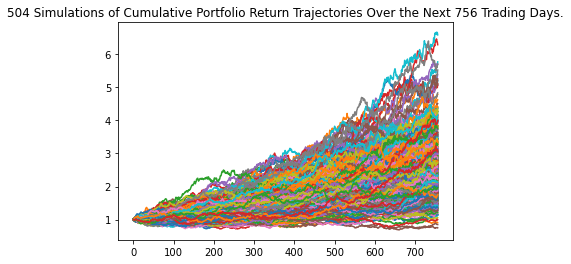

In [9]:
# Plot simulation outcomes
MC_stocks_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumulative Returns Across All 504 Simulations'}, ylabel='Frequency'>

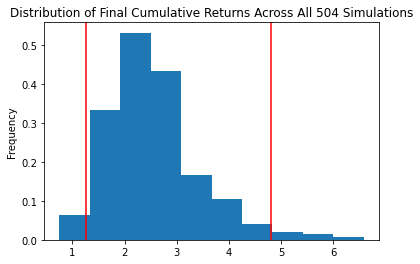

In [10]:
# Plot probability distribution and confidence intervals
MC_stocks_dist.plot_distribution()

In [11]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_stocks_dist.summarize_cumulative_return()

# Print summary statistics
summary

count           504.000000
mean              2.548954
std               0.894457
min               0.751930
25%               1.962292
50%               2.361287
75%               2.955869
max               6.583166
95% CI Lower      1.270686
95% CI Upper      4.800789
Name: 756, dtype: float64

In [12]:
# Set initial investment
initial_investment = 500000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $500,000
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $500000 in the portfolio over the next 3 years will end within in the range of $635343.17 and $2400394.61


In [13]:
# Configuring a Monte Carlo simulation to forecast 3 years cumulative returns
MC_stocks_3 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 504,
    num_trading_days = 252*3
)

In [14]:
# Running a Monte Carlo simulation to forecast 3 years cumulative returns
MC_stocks_3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986333,1.012953,1.006109,1.010268,1.008380,0.979203,1.003575,0.990488,1.007735,0.983376,...,1.003688,0.987383,1.006910,0.983994,0.998440,1.026912,1.000174,1.019701,1.013654,0.976010
2,0.997514,1.025727,1.004664,0.999012,1.007790,0.970418,1.010104,0.984223,1.015626,0.970285,...,0.994696,0.978105,0.995438,0.996005,1.002497,1.021649,0.964591,1.002300,1.032918,0.963486
3,1.002273,1.034034,1.011246,0.996870,1.022730,0.988751,1.029809,0.978395,1.012383,0.973863,...,1.013194,0.961823,0.992089,0.996665,1.013170,1.034456,0.982527,1.023545,1.044579,0.974438
4,0.985962,1.020691,1.016747,1.003104,1.028763,0.996871,1.028037,1.007247,1.021077,0.989470,...,1.031791,0.981521,0.995115,1.000196,1.034062,1.037579,0.971042,1.023931,1.049363,0.980084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.203437,1.869630,3.177236,3.624590,1.152449,3.744722,3.751435,1.813751,2.405701,1.620675,...,3.414182,1.769203,1.256238,3.116188,2.284401,2.373140,1.867072,0.999905,3.018005,6.458535
753,1.200093,1.852209,3.174304,3.641675,1.138684,3.738581,3.715680,1.781216,2.374134,1.625360,...,3.408434,1.783452,1.261356,3.042363,2.287963,2.417982,1.887777,0.999334,3.068787,6.494560
754,1.225784,1.816284,3.210178,3.676369,1.130175,3.763709,3.626012,1.809934,2.312322,1.618674,...,3.411592,1.756842,1.228480,3.133378,2.280677,2.412791,1.874212,1.015040,3.078663,6.442290
755,1.228797,1.861635,3.210290,3.708404,1.129434,3.807925,3.723936,1.799773,2.306276,1.647911,...,3.469541,1.792369,1.205524,3.092976,2.306206,2.435041,1.888254,1.022157,3.034361,6.465439


<AxesSubplot:title={'center':'504 Simulations of Cumulative Portfolio Return Trajectories Over the Next 756 Trading Days.'}>

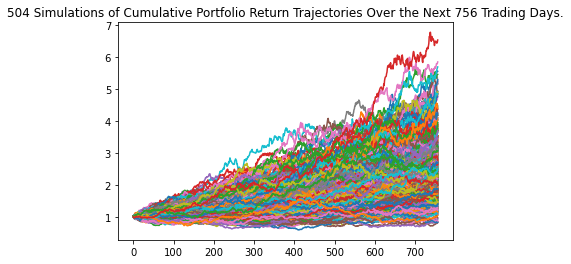

In [15]:
# Plot simulation outcomes
MC_stocks_3.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumulative Returns Across All 504 Simulations'}, ylabel='Frequency'>

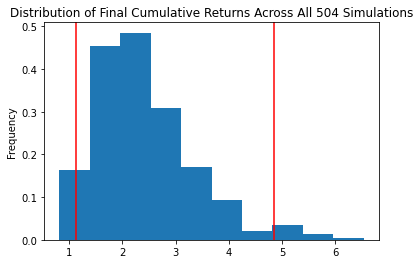

In [16]:
# Plot probability distribution and confidence intervals
MC_stocks_3.plot_distribution()

In [17]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_3 = MC_stocks_3.summarize_cumulative_return()

# Print summary statistics
summary_3

count           504.000000
mean              2.411263
std               0.922211
min               0.816418
25%               1.759858
50%               2.253579
75%               2.948364
max               6.539448
95% CI Lower      1.126704
95% CI Upper      4.853883
Name: 756, dtype: float64

In [18]:
# Set initial investment
initial_investment = 500000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $500,000
ci_lower_five = round(summary_3[8]*initial_investment, 2)
ci_upper_five = round(summary_3[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $500000 in the portfolio over the next 3 years will end within in the range of $563352.17 and $2426941.46


In [22]:
1.126704 * 500000

563352.0

In [21]:
4.853883 * 500000

2426941.5

In [23]:
# Configuring a Monte Carlo simulation to forecast 3 years cumulative returns
MC_stocks_even_split = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.5, 0.5],
    num_simulation = 504,
    num_trading_days = 252*3
)

In [24]:
# Running a Monte Carlo simulation to forecast 3 years cumulative returns
MC_stocks_even_split.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009018,0.994877,1.003012,0.998328,1.006809,1.012994,0.981512,0.995780,1.024620,1.002463,...,0.997653,1.001072,1.024618,1.009941,0.998416,1.005078,0.997615,0.990514,0.998444,0.994048
2,1.022396,0.994247,1.019736,1.007376,1.015554,1.010372,0.978727,0.998893,1.023167,1.018836,...,0.984887,1.006387,1.013212,1.010880,1.006452,1.010527,0.993481,0.965153,0.985058,0.967067
3,1.022770,0.972761,1.022298,1.001002,1.010903,0.993700,0.983146,1.011773,1.031009,1.007500,...,1.001740,1.008453,0.993564,1.022817,1.000935,1.022330,0.986812,0.978090,0.991121,0.963972
4,1.037530,0.954517,1.048494,0.979550,1.009814,0.997579,0.992417,1.008792,1.057234,1.015718,...,0.990184,1.015540,1.021479,1.018593,0.997896,1.035380,0.972640,0.990178,1.002915,0.952928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.808276,2.959813,2.388229,2.190836,1.933110,1.372573,1.396332,3.478773,2.609151,2.788108,...,1.820166,1.376113,2.850219,1.712515,2.937758,1.768929,3.183784,1.470851,2.031872,1.595286
753,1.817239,2.930580,2.410809,2.263727,1.925130,1.406688,1.399662,3.489299,2.599830,2.898678,...,1.852151,1.355546,2.786831,1.758020,2.968334,1.762667,3.166198,1.467321,2.004763,1.571604
754,1.852162,2.916276,2.388395,2.223545,1.927734,1.394852,1.380047,3.482764,2.647554,2.988798,...,1.869363,1.336112,2.799073,1.730446,2.958600,1.766204,3.225069,1.455202,1.991818,1.613356
755,1.855942,2.927936,2.397926,2.263348,1.923141,1.409026,1.385799,3.546987,2.579589,3.057616,...,1.910057,1.338186,2.821330,1.753036,2.989096,1.743304,3.273882,1.457381,1.997817,1.632747


<AxesSubplot:title={'center':'504 Simulations of Cumulative Portfolio Return Trajectories Over the Next 756 Trading Days.'}>

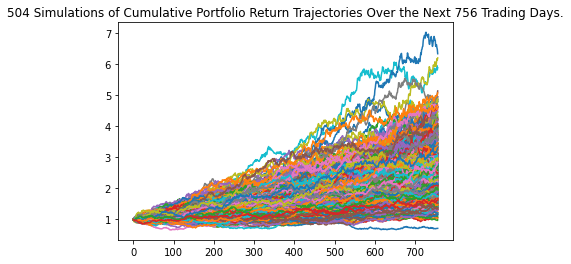

In [25]:
# Plot simulation outcomes
MC_stocks_even_split.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumulative Returns Across All 504 Simulations'}, ylabel='Frequency'>

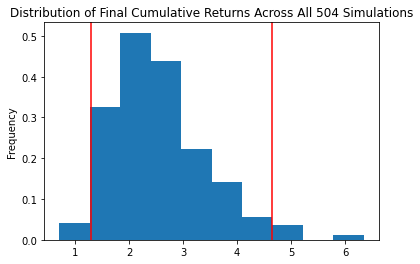

In [26]:
# Plot probability distribution and confidence intervals
MC_stocks_even_split.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_even_split = MC_stocks_even_split.summarize_cumulative_return()

# Print summary statistics
summary_even_split

count           504.000000
mean              2.552361
std               0.880150
min               0.713621
25%               1.932124
50%               2.408444
75%               2.997869
max               6.339322
95% CI Lower      1.298807
95% CI Upper      4.650963
Name: 756, dtype: float64

In [28]:
# Set initial investment
initial_investment = 500000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $500,000
ci_lower_five = round(summary_even_split[8]*initial_investment, 2)
ci_upper_five = round(summary_even_split[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $500000 in the portfolio over the next 3 years will end within in the range of $649403.72 and $2325481.73


## Only AMZN and only GOOG

In [29]:
# Configuring a Monte Carlo simulation to forecast 3 years cumulative returns
MC_stocks_amzn = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [1.0, 0],
    num_simulation = 504,
    num_trading_days = 252*3
)

In [30]:
# Running a Monte Carlo simulation to forecast 3 years cumulative returns
MC_stocks_amzn.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996742,0.997631,0.984556,0.987945,0.976552,1.041143,1.001836,0.974673,0.960612,0.932487,...,1.024775,1.016820,0.983001,1.009429,1.005785,0.987542,0.986112,1.020454,1.024886,1.009367
2,1.011811,1.016120,0.958931,1.001422,0.976234,1.065105,0.983775,1.004322,0.960859,0.935781,...,1.023229,1.012175,0.948728,1.009091,1.027824,0.982524,0.943451,1.000701,1.050534,1.021616
3,1.053724,1.010609,0.956179,0.998496,0.981129,1.084747,0.991707,0.974754,0.998649,0.932707,...,1.007165,1.009617,0.975131,0.972361,1.050126,0.974595,0.972575,0.986937,1.087906,1.009715
4,1.084254,1.024396,0.942556,0.998793,0.982730,1.059896,0.993812,0.986761,1.007198,0.932223,...,1.042820,0.991756,0.986041,0.957838,1.057095,0.998212,0.931370,0.995661,1.106756,1.027836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,3.396680,3.484568,0.912827,3.314827,2.070069,2.890869,1.072899,1.872968,7.115821,4.124218,...,1.300675,0.964146,1.648144,5.201966,3.603421,5.164042,1.625639,1.655397,2.512301,5.154229
753,3.453699,3.502332,0.864378,3.267060,2.057131,2.888612,1.054899,1.875405,7.068106,4.206531,...,1.304172,0.974073,1.702922,5.100770,3.654386,5.106179,1.658458,1.635650,2.538789,5.128756
754,3.500294,3.531521,0.906303,3.268533,2.051288,2.851896,1.034011,1.866655,7.008929,4.272859,...,1.285891,0.945684,1.751176,5.178645,3.775704,5.111506,1.728159,1.590812,2.507381,5.159910
755,3.624917,3.439988,0.895900,3.230276,2.094494,2.912757,1.003991,1.861410,6.943039,4.152631,...,1.270710,0.968792,1.784291,5.269407,3.903464,4.929233,1.775080,1.606607,2.526161,5.326283


<AxesSubplot:title={'center':'504 Simulations of Cumulative Portfolio Return Trajectories Over the Next 756 Trading Days.'}>

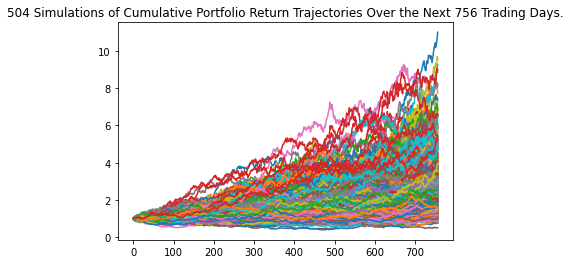

In [31]:
# Plot simulation outcomes
MC_stocks_amzn.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumulative Returns Across All 504 Simulations'}, ylabel='Frequency'>

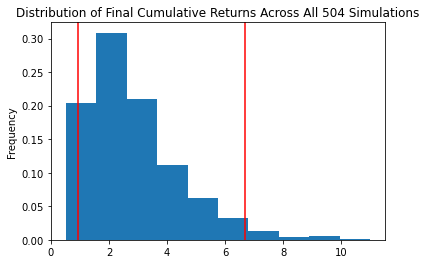

In [32]:
# Plot probability distribution and confidence intervals
MC_stocks_amzn.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_amzn = MC_stocks_amzn.summarize_cumulative_return()

# Print summary statistics
summary_amzn

count           504.000000
mean              2.851069
std               1.576121
min               0.512583
25%               1.667526
50%               2.489213
75%               3.625300
max              10.990475
95% CI Lower      0.948494
95% CI Upper      6.691340
Name: 756, dtype: float64

In [34]:
# Set initial investment
initial_investment = 500000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $500,000
ci_lower_five = round(summary_amzn[8]*initial_investment, 2)
ci_upper_five = round(summary_amzn[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $500000 in the portfolio over the next 3 years will end within in the range of $474246.97 and $3345669.9


In [35]:
# Now only GOOG

In [37]:
# Configuring a Monte Carlo simulation to forecast 3 years cumulative returns
MC_stocks_goog = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0, 1.0],
    num_simulation = 504,
    num_trading_days = 252*3
)

In [38]:
# Running a Monte Carlo simulation to forecast 3 years cumulative returns
MC_stocks_goog.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.024924,1.026086,1.028663,1.021858,1.014995,1.002642,1.004904,1.012891,1.001973,0.981964,...,1.013331,0.999570,0.978637,1.008630,1.009570,1.009158,1.005868,0.989807,1.005784,1.002733
2,1.021533,1.014422,1.030616,1.020498,1.030678,1.007143,1.008499,0.984077,1.008436,1.013365,...,1.014204,1.000976,0.959768,0.989970,1.002152,0.989310,1.011902,1.003290,1.006115,1.009776
3,0.977756,1.001893,0.998592,0.991565,1.015715,1.018356,1.000229,1.000107,1.016223,0.977039,...,1.003079,0.989848,0.972289,1.004305,1.049880,0.969025,1.011956,1.029686,1.008666,1.011618
4,0.964972,0.989773,0.999468,0.987227,0.989223,1.005602,0.989597,0.977570,1.031062,0.958387,...,1.002913,0.975237,0.971134,1.019976,1.087981,0.998794,0.979050,1.032492,0.995982,1.025695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,3.245555,2.119891,1.810263,0.701943,3.699312,3.858349,3.537745,2.872897,1.457106,2.344710,...,1.455363,2.988833,2.618328,3.092391,2.476424,1.802427,1.761819,2.791340,0.786232,1.317061
753,3.302343,2.092638,1.827498,0.719322,3.710246,3.894496,3.614619,2.965502,1.444572,2.358829,...,1.454194,2.995851,2.638847,3.088089,2.595893,1.785168,1.820936,2.774954,0.788543,1.294906
754,3.274461,2.101382,1.804487,0.730238,3.735038,3.974629,3.636026,2.927857,1.474316,2.385950,...,1.446892,2.977528,2.627232,3.070083,2.546918,1.826705,1.832035,2.801169,0.787647,1.238055
755,3.294255,2.037129,1.809333,0.718689,3.856203,4.020763,3.551196,2.921044,1.461265,2.373315,...,1.465568,2.995635,2.606663,3.078085,2.523325,1.820192,1.850148,2.834883,0.808010,1.239442


<AxesSubplot:title={'center':'504 Simulations of Cumulative Portfolio Return Trajectories Over the Next 756 Trading Days.'}>

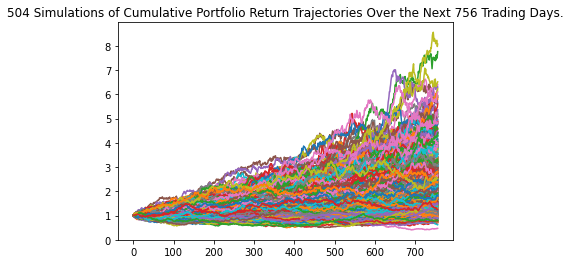

In [39]:
# Plot simulation outcomes
MC_stocks_goog.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumulative Returns Across All 504 Simulations'}, ylabel='Frequency'>

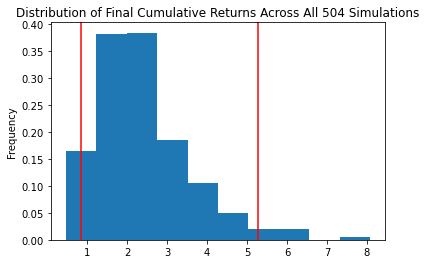

In [40]:
# Plot probability distribution and confidence intervals
MC_stocks_goog.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_goog = MC_stocks_goog.summarize_cumulative_return()

# Print summary statistics
summary_goog

count           504.000000
mean              2.403216
std               1.170788
min               0.468612
25%               1.610068
50%               2.147895
75%               2.952008
max               8.077881
95% CI Lower      0.836853
95% CI Upper      5.283919
Name: 756, dtype: float64

In [42]:
# Set initial investment
initial_investment = 500000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $500,000
ci_lower_five = round(summary_goog[8]*initial_investment, 2)
ci_upper_five = round(summary_goog[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $500000 in the portfolio over the next 3 years will end within in the range of $418426.5 and $2641959.45
